In [172]:
# Hamza Shahid
# Netid: Hshahi2
# Joshua Herman
# Netid: jherma20
# Muhammad Abdullah Umar
# Netid: mumar4
# Final Project - Diabetes Analysis

In [173]:
# load libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
pd.set_option('display.max_columns',100)
from sklearn.preprocessing import Imputer
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, fcluster

In [174]:
# load the dataset using pandas.read_csv
DIABETES_DATA = pd.read_csv('diabetes.csv')

In [175]:
# display the dataset
DIABETES_DATA.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [176]:
# dealing with missing values 
imputerBloodPressure=Imputer(missing_values=0, strategy="mean" )
DIABETES_DATA["BloodPressure"]=imputerBloodPressure.fit_transform(DIABETES_DATA[["BloodPressure"]]).ravel()

imputerSkinThickness=Imputer(missing_values=0, strategy="mean" )
DIABETES_DATA["SkinThickness"]=imputerSkinThickness.fit_transform(DIABETES_DATA[["SkinThickness"]]).ravel()

imputerBMI=Imputer(missing_values=0, strategy="mean" )
DIABETES_DATA["BMI"]=imputerBMI.fit_transform(DIABETES_DATA[["BMI"]]).ravel()

DIABETES_DATA

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.000000,35.00000,0,33.600000,0.627,50,1
1,1,85,66.000000,29.00000,0,26.600000,0.351,31,0
2,8,183,64.000000,29.15342,0,23.300000,0.672,32,1
3,1,89,66.000000,23.00000,94,28.100000,0.167,21,0
4,0,137,40.000000,35.00000,168,43.100000,2.288,33,1
5,5,116,74.000000,29.15342,0,25.600000,0.201,30,0
6,3,78,50.000000,32.00000,88,31.000000,0.248,26,1
7,10,115,72.405184,29.15342,0,35.300000,0.134,29,0
8,2,197,70.000000,45.00000,543,30.500000,0.158,53,1
9,8,125,96.000000,29.15342,0,32.457464,0.232,54,1


In [177]:

#-------------------------------------------------------------
# Exploratory Data Analysis 
# Explore the data using summary statistics and plots and
# identify the most important variables for data analysis
DIABETES_POSITIVE = DIABETES_DATA['Outcome'] == 1
DIABETES_NEGATIVE = DIABETES_DATA['Outcome'] == 0

In [178]:
DPInsulinMean = DIABETES_DATA.loc[DIABETES_POSITIVE, 'Insulin']
DPInsulinMean.describe()

count    268.000000
mean     100.335821
std      138.689125
min        0.000000
25%        0.000000
50%        0.000000
75%      167.250000
max      846.000000
Name: Insulin, dtype: float64

In [179]:
DNInsulinMean= DIABETES_DATA.loc[DIABETES_NEGATIVE, 'Insulin']
DNInsulinMean.describe()

count    500.000000
mean      68.792000
std       98.865289
min        0.000000
25%        0.000000
50%       39.000000
75%      105.000000
max      744.000000
Name: Insulin, dtype: float64

In [180]:
DPBMIMean= DIABETES_DATA.loc[DIABETES_POSITIVE, 'BMI']
DPBMIMean.describe()

count    268.000000
mean      35.384757
std        6.595065
min       22.900000
25%       30.900000
50%       34.250000
75%       38.775000
max       67.100000
Name: BMI, dtype: float64

In [181]:
DNBMIMean= DIABETES_DATA.loc[DIABETES_NEGATIVE, 'BMI']
DNBMIMean.describe()

count    500.000000
mean      30.888434
std        6.504779
min       18.200000
25%       25.750000
50%       30.400000
75%       35.300000
max       57.300000
Name: BMI, dtype: float64

In [182]:
DPDPFMean= DIABETES_DATA.loc[DIABETES_POSITIVE, 'DiabetesPedigreeFunction']
DPDPFMean.describe()


count    268.000000
mean       0.550500
std        0.372354
min        0.088000
25%        0.262500
50%        0.449000
75%        0.728000
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

In [183]:
DNDPFMean= DIABETES_DATA.loc[DIABETES_NEGATIVE, 'DiabetesPedigreeFunction']
DNDPFMean.describe()

count    500.000000
mean       0.429734
std        0.299085
min        0.078000
25%        0.229750
50%        0.336000
75%        0.561750
max        2.329000
Name: DiabetesPedigreeFunction, dtype: float64

In [184]:
DPAgeMean= DIABETES_DATA.loc[DIABETES_POSITIVE, 'Age']
DPAgeMean.describe()

count    268.000000
mean      37.067164
std       10.968254
min       21.000000
25%       28.000000
50%       36.000000
75%       44.000000
max       70.000000
Name: Age, dtype: float64

In [185]:
DNAgeMean= DIABETES_DATA.loc[DIABETES_NEGATIVE, 'Age']
DNAgeMean.describe()

count    500.000000
mean      31.190000
std       11.667655
min       21.000000
25%       23.000000
50%       27.000000
75%       37.000000
max       81.000000
Name: Age, dtype: float64

In [186]:
# Exploratory Data Analysis 
DPPreg= DIABETES_DATA.loc[DIABETES_POSITIVE, 'Pregnancies']
DPPregMean = DPPreg.mean()
DPPreg.describe()


count    268.000000
mean       4.865672
std        3.741239
min        0.000000
25%        1.750000
50%        4.000000
75%        8.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [187]:
# Exploratory Data Analysis 
DNPreg= DIABETES_DATA.loc[DIABETES_NEGATIVE, 'Pregnancies']
DNPregMean = DNPreg.mean()
DNPreg.describe()

count    500.000000
mean       3.298000
std        3.017185
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       13.000000
Name: Pregnancies, dtype: float64

In [188]:
# Exploratory Data Analysis 
DPGlucose= DIABETES_DATA.loc[DIABETES_POSITIVE, 'Glucose']
DPGlucoseMean = DPGlucose.mean()
DPGlucose.describe()

count    268.000000
mean     141.257463
std       31.939622
min        0.000000
25%      119.000000
50%      140.000000
75%      167.000000
max      199.000000
Name: Glucose, dtype: float64

In [189]:
# Exploratory Data Analysis 
DNGlucose = DIABETES_DATA.loc[DIABETES_NEGATIVE, 'Glucose']
DNGlucoseMean = DNGlucose.mean()
DNGlucose.describe()

count    500.0000
mean     109.9800
std       26.1412
min        0.0000
25%       93.0000
50%      107.0000
75%      125.0000
max      197.0000
Name: Glucose, dtype: float64

In [190]:
# Exploratory Data Analysis 
DPBloodPressure= DIABETES_DATA.loc[DIABETES_POSITIVE, 'BloodPressure']
DPBloodPressureMean = DPBloodPressure.mean()
DPBloodPressure.describe()

count    268.000000
mean      75.147324
std       11.945712
min       30.000000
25%       68.000000
50%       74.000000
75%       82.000000
max      114.000000
Name: BloodPressure, dtype: float64

In [191]:
# Exploratory Data Analysis 
DNBloodPressure= DIABETES_DATA.loc[DIABETES_NEGATIVE, 'BloodPressure']
DNBloodPressureMean = DNBloodPressure.mean()
DNBloodPressure.describe()

count    500.000000
mean      70.935397
std       11.931033
min       24.000000
25%       63.500000
50%       72.000000
75%       78.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [192]:
# Exploratory Data Analysis 
DPSkinThickness= DIABETES_DATA.loc[DIABETES_POSITIVE, 'SkinThickness']
DPSkinThicknessMean = DPSkinThickness.mean()
DPSkinThickness.describe()

count    268.000000
mean      31.736944
std        8.647599
min        7.000000
25%       29.153420
50%       29.153420
75%       36.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [193]:
# Exploratory Data Analysis 
DNSkinThickness= DIABETES_DATA.loc[DIABETES_NEGATIVE, 'SkinThickness']
DNSkinThicknessMean = DNSkinThickness.mean()
DNSkinThickness.describe()

count    500.000000
mean      27.768651
std        8.559606
min        7.000000
25%       22.000000
50%       29.153420
75%       31.000000
max       60.000000
Name: SkinThickness, dtype: float64

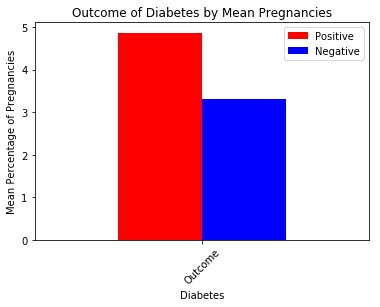

In [194]:
df = pd.DataFrame({"date_x":[2015]*1,
                   "Occurance_x":[4.866],
                   "Diabetes":["Outcome"],
                   "date_y":[2016]*1,
                   "Occurance_y":[3.298]})

ax = df[["Diabetes","Occurance_x", "Occurance_y"]].plot(x='Diabetes',
                                                      kind='bar', 
                                                      color=["r","b"],
                                                      rot=45)
ax.set(title = 'Outcome of Diabetes by Mean Pregnancies', ylabel= 'Mean Percentage of Pregnancies')
ax.legend(["Positive", "Negative"]);


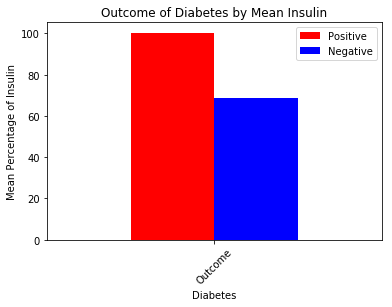

In [195]:
df = pd.DataFrame({"date_x":[2015]*1,
                   "Occurance_x":[100.33582089552239],
                   "Diabetes":["Outcome"],
                   "date_y":[2016]*1,
                   "Occurance_y":[68.792]})

ax = df[["Diabetes","Occurance_x", "Occurance_y"]].plot(x='Diabetes',
                                                      kind='bar', 
                                                      color=["r","b"],
                                                      rot=45)
ax.set(title = 'Outcome of Diabetes by Mean Insulin', ylabel= 'Mean Percentage of Insulin')
ax.legend(["Positive", "Negative"]);

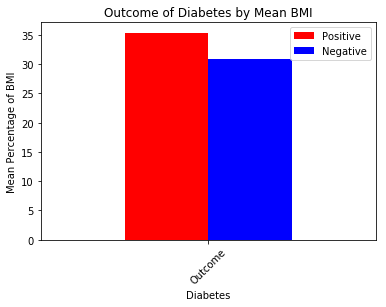

In [196]:
df = pd.DataFrame({"date_x":[2015]*1,
                   "Occurance_x":[35.38475719158496],
                   "Diabetes":["Outcome"],
                   "date_y":[2016]*1,
                   "Occurance_y":[30.888434346103004]})

ax = df[["Diabetes","Occurance_x", "Occurance_y"]].plot(x='Diabetes',
                                                      kind='bar', 
                                                      color=["r","b"],
                                                      rot=45)
ax.set(title = 'Outcome of Diabetes by Mean BMI', ylabel= 'Mean Percentage of BMI')
ax.legend(["Positive", "Negative"]);

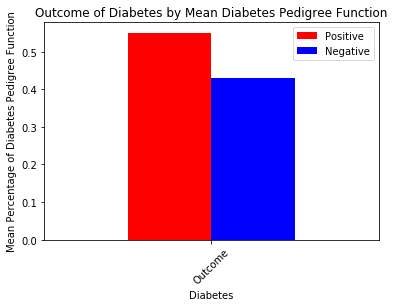

In [197]:
df = pd.DataFrame({"date_x":[2015]*1,
                   "Occurance_x":[0.5505],
                   "Diabetes":["Outcome"],
                   "date_y":[2016]*1,
                   "Occurance_y":[0.42973400000000017]})

ax = df[["Diabetes","Occurance_x", "Occurance_y"]].plot(x='Diabetes',
                                                      kind='bar', 
                                                      color=["r","b"],
                                                      rot=45)
ax.set(title = 'Outcome of Diabetes by Mean Diabetes Pedigree Function', ylabel= 'Mean Percentage of Diabetes Pedigree Function')
ax.legend(["Positive", "Negative"]);

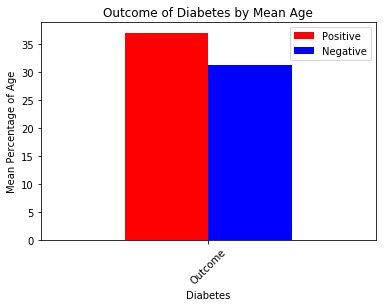

In [198]:
df = pd.DataFrame({"date_x":[2015]*1,
                   "Occurance_x":[37.06716417910448],
                   "Diabetes":["Outcome"],
                   "date_y":[2016]*1,
                   "Occurance_y":[31.19]})

ax = df[["Diabetes","Occurance_x", "Occurance_y"]].plot(x='Diabetes',
                                                      kind='bar', 
                                                      color=["r","b"],
                                                      rot=45)
ax.set(title = 'Outcome of Diabetes by Mean Age', ylabel= 'Mean Percentage of Age')
ax.legend(["Positive", "Negative"]);

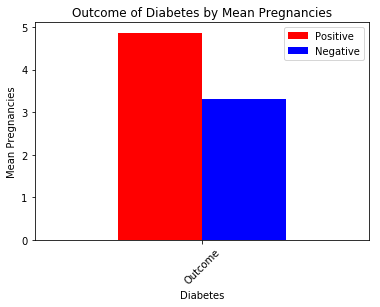

In [199]:
# Pregnancies 
df = pd.DataFrame({"date_x":[2015]*1,
                   "Occurance_x":[4.866],
                   "Diabetes":["Outcome"],
                   "date_y":[2016]*1,
                   "Occurance_y":[3.298]})

ax = df[["Diabetes","Occurance_x", "Occurance_y"]].plot(x='Diabetes',
                                                      kind='bar', 
                                                      color=["r","b"],
                                                      rot=45)
ax.set(title = 'Outcome of Diabetes by Mean Pregnancies', ylabel= 'Mean Pregnancies')
ax.legend(["Positive", "Negative"]);

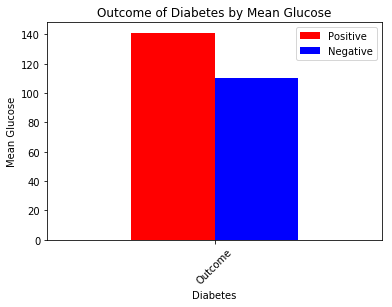

In [200]:
# Glucose 
df = pd.DataFrame({"date_x":[2015]*1,
                   "Occurance_x":[DPGlucoseMean],
                   "Diabetes":["Outcome"],
                   "date_y":[2016]*1,
                   "Occurance_y":[DNGlucoseMean]})

ax = df[["Diabetes","Occurance_x", "Occurance_y"]].plot(x='Diabetes',
                                                      kind='bar', 
                                                      color=["r","b"],
                                                      rot=45)
ax.set(title = 'Outcome of Diabetes by Mean Glucose', ylabel= 'Mean Glucose')
ax.legend(["Positive", "Negative"]);

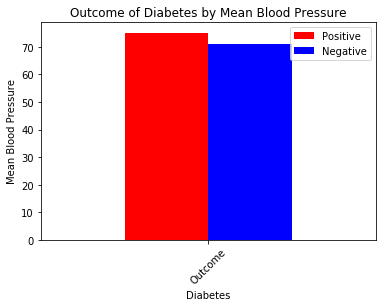

In [201]:
# BP
df = pd.DataFrame({"date_x":[2015]*1,
                   "Occurance_x":[DPBloodPressureMean],
                   "Diabetes":["Outcome"],
                   "date_y":[2016]*1,
                   "Occurance_y":[DNBloodPressureMean]})

ax = df[["Diabetes","Occurance_x", "Occurance_y"]].plot(x='Diabetes',
                                                      kind='bar', 
                                                      color=["r","b"],
                                                      rot=45)
ax.set(title = 'Outcome of Diabetes by Mean Blood Pressure', ylabel= 'Mean Blood Pressure')
ax.legend(["Positive", "Negative"]);

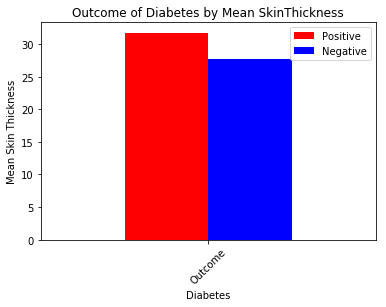

In [202]:
# ST
df = pd.DataFrame({"date_x":[2015]*1,
                   "Occurance_x":[DPSkinThicknessMean],
                   "Diabetes":["Outcome"],
                   "date_y":[2016]*1,
                   "Occurance_y":[DNSkinThicknessMean]})

ax = df[["Diabetes","Occurance_x", "Occurance_y"]].plot(x='Diabetes',
                                                      kind='bar', 
                                                      color=["r","b"],
                                                      rot=45)
ax.set(title = 'Outcome of Diabetes by Mean SkinThickness', ylabel= 'Mean Skin Thickness')
ax.legend(["Positive", "Negative"]);

In [203]:
#Age hypothesis test
#H0 = M1 <= M2
#HA = M1 > M2 
stats.ttest_ind(DPAgeMean,DNAgeMean, equal_var=False)

Ttest_indResult(statistic=6.92073837898804, pvalue=1.2015125273113395e-11)

In [204]:
#Insulin hypothesis test
#H0 = M1 <= M2
#HA = M1 > M2 
stats.ttest_ind(DPInsulinMean, DNInsulinMean, equal_var=False)

Ttest_indResult(statistic=3.3008947714793337, pvalue=0.0010469286528313425)

In [205]:
#BMI hypothesis test
#H0 = M1 <= M2
#HA = M1 > M2 
stats.ttest_ind(DPBMIMean, DNBMIMean, equal_var = False)

Ttest_indResult(statistic=9.048582105578078, pvalue=2.6168665306875313e-18)

In [206]:
#DPF hypothesis test
#H0 = M1 <= M2
#HA = M1 > M2 
stats.ttest_ind(DPDPFMean, DNDPFMean, equal_var = False)

Ttest_indResult(statistic=4.576812008291278, pvalue=6.100481424240326e-06)

In [207]:
# Hypothesis test for pregnancies and diabetes (1 = +, 2= -)
# H0 = m1 <= m2
# Ha = m1 > m2
from scipy import stats

stats.ttest_ind(DPPreg, DNPreg, equal_var = False)


Ttest_indResult(statistic=5.9069614794974905, pvalue=6.821925600457145e-09)

In [208]:
# Hypothesis test for Blood Pressure and diabetes (1 = +, 2= -)
# H0 = m1 <= m2
# Ha = m1 > m2
stats.ttest_ind(DPBloodPressure, DNBloodPressure, equal_var = False)

Ttest_indResult(statistic=4.659365773434451, pvalue=3.990682990682639e-06)

In [209]:
# Hypothesis test for Glucose and diabetes (1 = +, 2= -)
# H0 = m1 <= m2
# Ha = m1 > m2
stats.ttest_ind(DPGlucose, DNGlucose, equal_var = False)

Ttest_indResult(statistic=13.751537067396411, pvalue=2.6441613495403223e-36)

In [210]:
# Hypothesis test for Skin Thickness and diabetes (1 = +, 2= -)
# H0 = m1 <= m2
# Ha = m1 > m2
stats.ttest_ind(DPSkinThickness, DNSkinThickness, equal_var = False)

Ttest_indResult(statistic=6.08302590652634, pvalue=2.2316137489413956e-09)

In [211]:
#
# Blood pressure linear regression relationships
#

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     34.82
Date:                Wed, 05 Dec 2018   Prob (F-statistic):           5.43e-09
Time:                        08:42:47   Log-Likelihood:                -2986.7
No. Observations:                 768   AIC:                             5977.
Df Residuals:                     766   BIC:                             5987.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      69.5269      0.648    107.232      

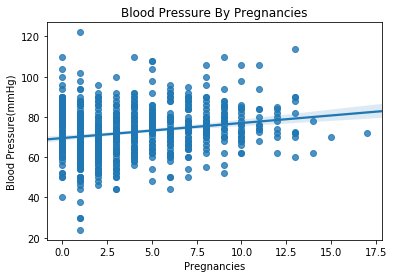

In [212]:
# plot blood pressure vs pregnancies
axis=sns.regplot(DIABETES_DATA['Pregnancies'],DIABETES_DATA['BloodPressure'])
axis.set(title='Blood Pressure By Pregnancies', xlabel='Pregnancies', ylabel='Blood Pressure(mmHg)')


model=smf.ols(formula='BloodPressure ~ Pregnancies', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     38.12
Date:                Wed, 05 Dec 2018   Prob (F-statistic):           1.08e-09
Time:                        08:42:47   Log-Likelihood:                -2985.1
No. Observations:                 768   AIC:                             5974.
Df Residuals:                     766   BIC:                             5984.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.4466      1.668     37.430      0.0

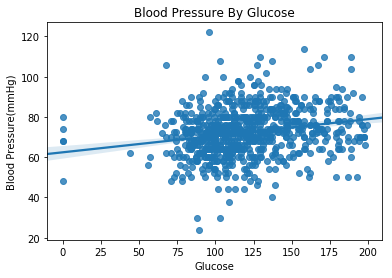

In [213]:
# plot blood pressure vs glucose
axis=sns.regplot(DIABETES_DATA['Glucose'],DIABETES_DATA['BloodPressure'])
axis.set(title='Blood Pressure By Glucose', xlabel='Glucose', ylabel='Blood Pressure(mmHg)')


model=smf.ols(formula='BloodPressure ~ Glucose', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     29.58
Date:                Wed, 05 Dec 2018   Prob (F-statistic):           7.23e-08
Time:                        08:42:48   Log-Likelihood:                -2989.2
No. Observations:                 768   AIC:                             5982.
Df Residuals:                     766   BIC:                             5992.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        64.6703      1.485     43.538

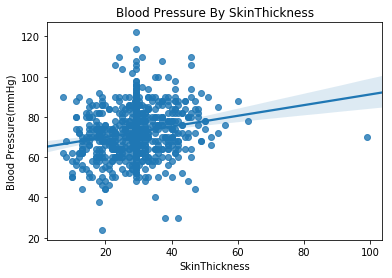

In [214]:
# plot blood pressure vs skin thickness
axis=sns.regplot(DIABETES_DATA['SkinThickness'],DIABETES_DATA['BloodPressure'])
axis.set(title='Blood Pressure By SkinThickness', xlabel='SkinThickness', ylabel='Blood Pressure(mmHg)')


model=smf.ols(formula='BloodPressure ~ SkinThickness', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.683
Date:                Wed, 05 Dec 2018   Prob (F-statistic):              0.195
Time:                        08:42:48   Log-Likelihood:                -3003.0
No. Observations:                 768   AIC:                             6010.
Df Residuals:                     766   BIC:                             6019.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.7974      0.531    137.148      0.0

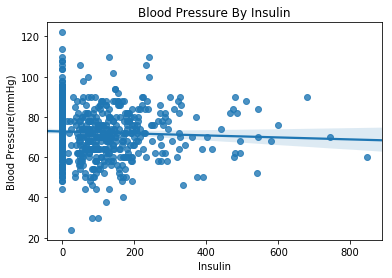

In [215]:
# plot blood pressure vs insulin
axis=sns.regplot(DIABETES_DATA['Insulin'],DIABETES_DATA['BloodPressure'])
axis.set(title='Blood Pressure By Insulin', xlabel='Insulin', ylabel='Blood Pressure(mmHg)')


model=smf.ols(formula='BloodPressure ~ Insulin', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     65.81
Date:                Wed, 05 Dec 2018   Prob (F-statistic):           1.97e-15
Time:                        08:42:49   Log-Likelihood:                -2972.1
No. Observations:                 768   AIC:                             5948.
Df Residuals:                     766   BIC:                             5958.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.3429      2.024     27.838      0.0

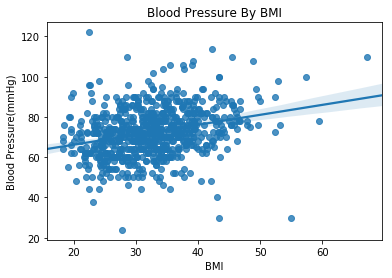

In [216]:
# plot blood pressure vs BMI
axis=sns.regplot(DIABETES_DATA['BMI'],DIABETES_DATA['BloodPressure'])
axis.set(title='Blood Pressure By BMI', xlabel='BMI', ylabel='Blood Pressure(mmHg)')


model=smf.ols(formula='BloodPressure ~ BMI', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.005849
Date:                Wed, 05 Dec 2018   Prob (F-statistic):              0.939
Time:                        08:42:49   Log-Likelihood:                -3003.8
No. Observations:                 768   AIC:                             6012.
Df Residuals:                     766   BIC:                             6021.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

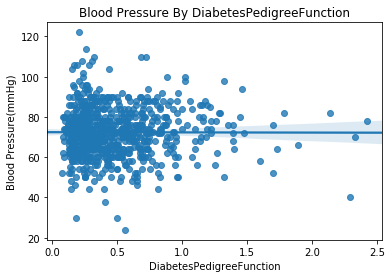

In [217]:
# plot blood pressure vs diabetes pedigree function
axis=sns.regplot(DIABETES_DATA['DiabetesPedigreeFunction'],DIABETES_DATA['BloodPressure'])
axis.set(title='Blood Pressure By DiabetesPedigreeFunction', xlabel='DiabetesPedigreeFunction', ylabel='Blood Pressure(mmHg)')


model=smf.ols(formula='BloodPressure ~ DiabetesPedigreeFunction', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     90.21
Date:                Wed, 05 Dec 2018   Prob (F-statistic):           2.66e-20
Time:                        08:42:49   Log-Likelihood:                -2961.0
No. Observations:                 768   AIC:                             5926.
Df Residuals:                     766   BIC:                             5935.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     61.3070      1.239     49.467      0.0

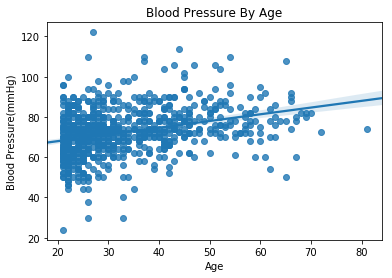

In [218]:
# plot blood pressure vs age
axis=sns.regplot(DIABETES_DATA['Age'],DIABETES_DATA['BloodPressure'])
axis.set(title='Blood Pressure By Age', xlabel='Age', ylabel='Blood Pressure(mmHg)')


model=smf.ols(formula='BloodPressure ~ Age', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

In [219]:
#
# blood pressure multiple regression relationship
#

In [220]:
# blood pressure vs age + BMI + glucose
model=smf.ols(formula='BloodPressure ~ Age+BMI+Glucose', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     58.26
Date:                Wed, 05 Dec 2018   Prob (F-statistic):           6.36e-34
Time:                        08:42:50   Log-Likelihood:                -2924.7
No. Observations:                 768   AIC:                             5857.
Df Residuals:                     764   BIC:                             5876.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.8612      2.348     18.681      0.0

In [221]:
#
# glucose linear regression relationships
#

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     26.38
Date:                Wed, 05 Dec 2018   Prob (F-statistic):           3.56e-07
Time:                        08:42:50   Log-Likelihood:                -3737.3
No. Observations:                 768   AIC:                             7479.
Df Residuals:                     766   BIC:                             7488.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       101.5487      3.934     25.813

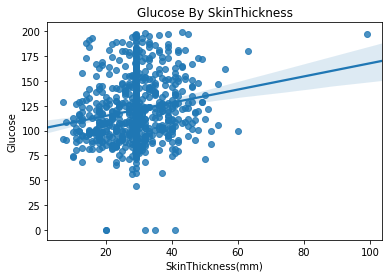

In [222]:
# plot Glucose vs Skin Thickness
axis=sns.regplot(DIABETES_DATA['SkinThickness'],DIABETES_DATA['Glucose'])
axis.set(title='Glucose By SkinThickness', xlabel='SkinThickness(mm)', ylabel='Glucose')


model=smf.ols(formula='Glucose ~ SkinThickness', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     38.34
Date:                Wed, 05 Dec 2018   Prob (F-statistic):           9.70e-10
Time:                        08:42:50   Log-Likelihood:                -3731.5
No. Observations:                 768   AIC:                             7467.
Df Residuals:                     766   BIC:                             7476.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     87.9413      5.440     16.165      0.0

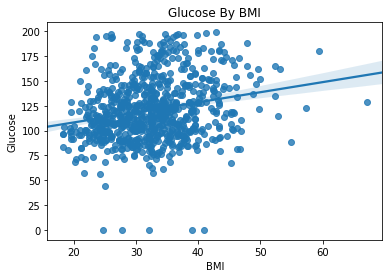

In [223]:
# plot Glucose vs BMI
axis=sns.regplot(DIABETES_DATA['BMI'],DIABETES_DATA['Glucose'])
axis.set(title='Glucose By BMI', xlabel='BMI', ylabel='Glucose')


model=smf.ols(formula='Glucose ~ BMI', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     57.16
Date:                Wed, 05 Dec 2018   Prob (F-statistic):           1.15e-13
Time:                        08:42:51   Log-Likelihood:                -3722.6
No. Observations:                 768   AIC:                             7449.
Df Residuals:                     766   BIC:                             7459.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     97.0802      3.341     29.058      0.0

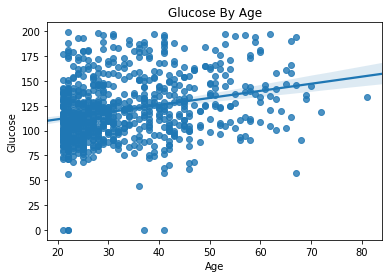

In [224]:
# plot Glucose vs Age
axis=sns.regplot(DIABETES_DATA['Age'],DIABETES_DATA['Glucose'])
axis.set(title='Glucose By Age', xlabel='Age', ylabel='Glucose')


model=smf.ols(formula='Glucose ~ Age', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     13.06
Date:                Wed, 05 Dec 2018   Prob (F-statistic):           0.000322
Time:                        08:42:51   Log-Likelihood:                -3743.8
No. Observations:                 768   AIC:                             7492.
Df Residuals:                     766   BIC:                             7501.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     116.1713      1.738     66.860      

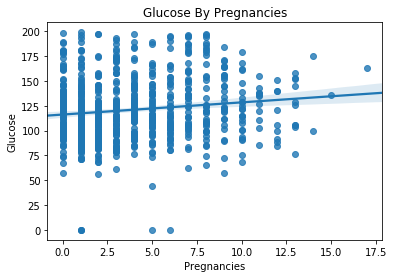

In [225]:
# plot Glucose vs Pregnancies
axis=sns.regplot(DIABETES_DATA['Pregnancies'],DIABETES_DATA['Glucose'])
axis.set(title='Glucose By Pregnancies', xlabel='Pregnancies', ylabel='Glucose')


model=smf.ols(formula='Glucose ~ Pregnancies', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     94.48
Date:                Wed, 05 Dec 2018   Prob (F-statistic):           3.88e-21
Time:                        08:42:52   Log-Likelihood:                -3705.6
No. Observations:                 768   AIC:                             7415.
Df Residuals:                     766   BIC:                             7425.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    113.5586      1.325     85.694      0.0

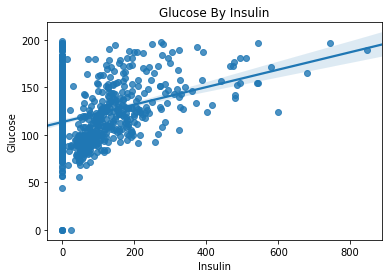

In [226]:
# plot Glucose vs Insulin
axis=sns.regplot(DIABETES_DATA['Insulin'],DIABETES_DATA['Glucose'])
axis.set(title='Glucose By Insulin', xlabel='Insulin', ylabel='Glucose')


model=smf.ols(formula='Glucose ~ Insulin', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     14.73
Date:                Wed, 05 Dec 2018   Prob (F-statistic):           0.000135
Time:                        08:42:52   Log-Likelihood:                -3743.0
No. Observations:                 768   AIC:                             7490.
Df Residuals:                     766   BIC:                             7499.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

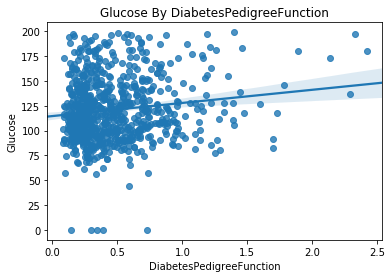

In [227]:
# plot Glucose vs DiabetesPedigreeFunction
axis=sns.regplot(DIABETES_DATA['DiabetesPedigreeFunction'],DIABETES_DATA['Glucose'])
axis.set(title='Glucose By DiabetesPedigreeFunction', xlabel='DiabetesPedigreeFunction', ylabel='Glucose')


model=smf.ols(formula='Glucose ~ DiabetesPedigreeFunction', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     38.12
Date:                Wed, 05 Dec 2018   Prob (F-statistic):           1.08e-09
Time:                        08:42:52   Log-Likelihood:                -3731.6
No. Observations:                 768   AIC:                             7467.
Df Residuals:                     766   BIC:                             7477.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        79.2261      6.842     11.579

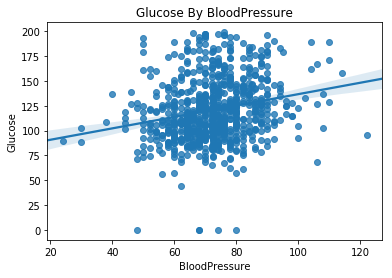

In [228]:
# plot Glucose vs BloodPressure
axis=sns.regplot(DIABETES_DATA['BloodPressure'],DIABETES_DATA['Glucose'])
axis.set(title='Glucose By BloodPressure', xlabel='BloodPressure', ylabel='Glucose')


model=smf.ols(formula='Glucose ~ BloodPressure', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

In [229]:
#
# glucose multiple regression relationship
#

In [230]:
# glucose vs BMI + Age + Insulin
model=smf.ols(formula='Glucose ~ BMI + Age + Insulin + BloodPressure', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     54.46
Date:                Wed, 05 Dec 2018   Prob (F-statistic):           2.11e-40
Time:                        08:42:53   Log-Likelihood:                -3653.8
No. Observations:                 768   AIC:                             7318.
Df Residuals:                     763   BIC:                             7341.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        51.1004      7.097      7.200

In [231]:
#
# BMI linear regression relationships
#

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     38.34
Date:                Wed, 05 Dec 2018   Prob (F-statistic):           9.70e-10
Time:                        08:42:53   Log-Likelihood:                -2551.1
No. Observations:                 768   AIC:                             5106.
Df Residuals:                     766   BIC:                             5116.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.7820      0.948     28.248      0.0

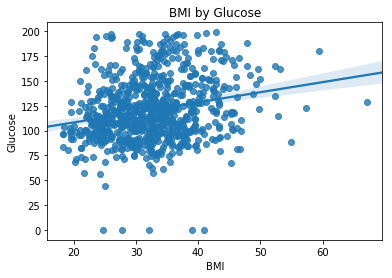

In [232]:
# plot BMI vs Glucose
axis=sns.regplot(DIABETES_DATA['BMI'],DIABETES_DATA['Glucose'])
axis.set(title='BMI by Glucose', xlabel='BMI', ylabel='Glucose')


model=smf.ols(formula= 'BMI ~ Glucose', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     319.3
Date:                Wed, 05 Dec 2018   Prob (F-statistic):           5.89e-60
Time:                        08:42:53   Log-Likelihood:                -2436.1
No. Observations:                 768   AIC:                             4876.
Df Residuals:                     766   BIC:                             4885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        20.0908      0.723     27.794

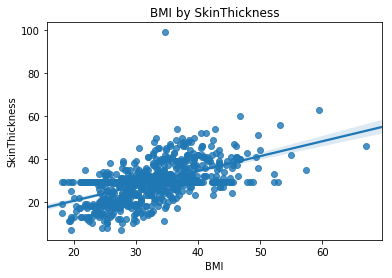

In [233]:
# plot BMI vs SkinThickness
axis=sns.regplot(DIABETES_DATA['BMI'],DIABETES_DATA['SkinThickness'])
axis.set(title='BMI by SkinThickness', xlabel='BMI', ylabel='SkinThickness')


model=smf.ols(formula= 'BMI ~ SkinThickness', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4992
Date:                Wed, 05 Dec 2018   Prob (F-statistic):              0.480
Time:                        08:42:54   Log-Likelihood:                -2569.6
No. Observations:                 768   AIC:                             5143.
Df Residuals:                     766   BIC:                             5153.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.9616      0.744     42.931      0.0

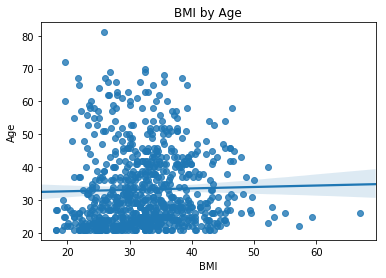

In [234]:
# plot BMI vs Age 
axis=sns.regplot(DIABETES_DATA['BMI'],DIABETES_DATA['Age'])
axis.set(title='BMI by Age', xlabel='BMI', ylabel='Age')


model=smf.ols(formula= 'BMI ~ Age', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3564
Date:                Wed, 05 Dec 2018   Prob (F-statistic):              0.551
Time:                        08:42:54   Log-Likelihood:                -2569.7
No. Observations:                 768   AIC:                             5143.
Df Residuals:                     766   BIC:                             5153.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      32.2883      0.377     85.711      

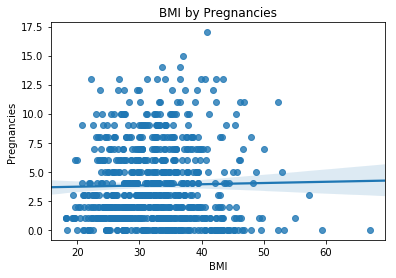

In [235]:
# plot BMI vs Pregnancies
axis=sns.regplot(DIABETES_DATA['BMI'],DIABETES_DATA['Pregnancies'])
axis.set(title='BMI by Pregnancies', xlabel='BMI', ylabel='Pregnancies')


model=smf.ols(formula= 'BMI ~ Pregnancies', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     27.07
Date:                Wed, 05 Dec 2018   Prob (F-statistic):           2.52e-07
Time:                        08:42:54   Log-Likelihood:                -2556.5
No. Observations:                 768   AIC:                             5117.
Df Residuals:                     766   BIC:                             5126.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.5779      0.297    106.389      0.0

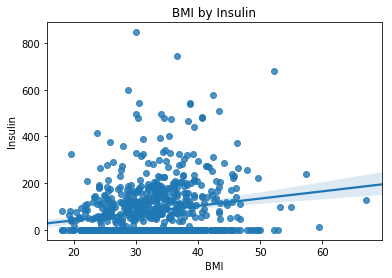

In [236]:
# plot BMI vs Glucose
axis=sns.regplot(DIABETES_DATA['BMI'],DIABETES_DATA['Insulin'])
axis.set(title='BMI by Insulin', xlabel='BMI', ylabel='Insulin')


model=smf.ols(formula= 'BMI ~ Insulin', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     18.46
Date:                Wed, 05 Dec 2018   Prob (F-statistic):           1.96e-05
Time:                        08:42:55   Log-Likelihood:                -2560.7
No. Observations:                 768   AIC:                             5125.
Df Residuals:                     766   BIC:                             5135.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

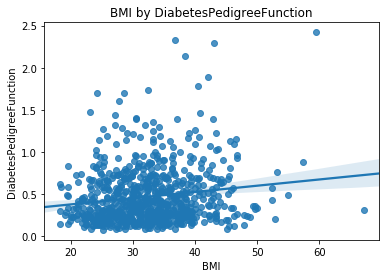

In [237]:
# plot BMI vs DBF
axis=sns.regplot(DIABETES_DATA['BMI'],DIABETES_DATA['DiabetesPedigreeFunction'])
axis.set(title='BMI by DiabetesPedigreeFunction', xlabel='BMI', ylabel='DiabetesPedigreeFunction')


model=smf.ols(formula= 'BMI ~ DiabetesPedigreeFunction', data=DIABETES_DATA)
results=model.fit()
print(results.summary())



In [238]:
#
# BMI multiple regression relationship
#

In [239]:
# BMI vs SkinThickness + BloodPressure + Glucose
model=smf.ols(formula= 'BMI ~ BloodPressure + SkinThickness + Glucose', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     128.0
Date:                Wed, 05 Dec 2018   Prob (F-statistic):           3.49e-67
Time:                        08:42:55   Log-Likelihood:                -2413.5
No. Observations:                 768   AIC:                             4835.
Df Residuals:                     764   BIC:                             4854.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.9763      1.387      8.637

[(  1,  98,  1,  1.23500000e+02, 0.94070582, 576, 576.)
 (  2,   9,  5,  2.64500008e+01, 0.68523614, 329, 329.)
 (  3,   8,  3,  1.35000000e+01, 0.09140162,  86,  86.)
 (  4,   5,  6,  6.67999983e-01, 0.41381685,  12,  12.)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,  10,  10.)
 (  6,   7,  2,  6.50000000e+01, 1.        ,   2,   2.)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,   1,   1.)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,   1,   1.)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,  74,  74.)
 ( 10,  49,  7,  2.85000000e+01, 0.79966296, 243, 243.)
 ( 11,  20,  3,  2.90767097e+01, 0.53283506, 132, 132.)
 ( 12,  13,  5,  3.27000008e+01, 0.22228483,  56,  56.)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,  35,  35.)
 ( 14,  19,  6,  7.05999970e-01, 0.45371634,  21,  21.)
 ( 15,  16,  2,  8.15000000e+01, 0.28639696,  20,  20.)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,  17,  17.)
 ( 17,  18,  4,  3.80000000e+01, 0.91829583,   3,   3.)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,   1

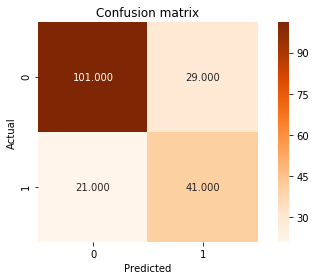

In [240]:
#---------------------------------------------------------
# CLASSIFICATION 
# Because we want to test whether a patient is diabetic or non-diabetic based on different features
# 1. Everything grouped together
# 2. Highest difference in means grouped together (preg, glucose, Insulin, BMI, DPF, Age)
# 3. Lowest p-values grouped together  (Glucose, BMI)
# 4. Highest R-Squared in multiple regression grouped together 
# (BMI ~ BloodPressure + SkinThickness + Glucose), (Glucose ~ BMI + Age + Insulin + BloodPressure)
# (BloodPressure ~ Age+BMI+Glucose)
# 5. Experimentations

# Partition the dataset into a training set and a validation set using the holdout method or
# the cross-validation method. 
x_train, x_test, y_train, y_test = train_test_split(DIABETES_DATA[['Pregnancies','Glucose',
                                                                   'BloodPressure','SkinThickness',
                                                                  'Insulin', 'BMI', 
                                                                   'DiabetesPedigreeFunction', 'Age']],DIABETES_DATA['Outcome'],test_size=0.25,random_state=0)
#Standardize the training set and the validation set.
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test)

#DECISION TREE CLASSIFIER FOR EVERY VARIABLE
classifier=DecisionTreeClassifier(criterion='entropy',random_state=10)
classifier.fit(x_train,y_train)

print(classifier.tree_.__getstate__()['nodes'])
len(classifier.tree_.__getstate__()['nodes'])

y_pred=classifier.predict(x_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [241]:
#Decision Trees(Evaluation Matrix) for every feature
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)


Accuracy
0.7395833333333334

Error
0.26041666666666663

Precision
[0.82786885 0.58571429]

Recall
[0.77692308 0.66129032]

F1_score
[0.8015873  0.62121212]


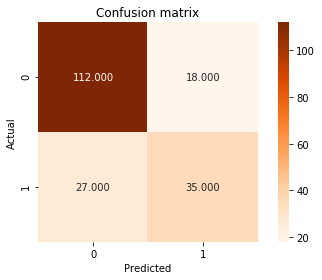

In [242]:
#NAIVE BAYES CLASSIFIER FOR EVERY VARIABLE
classifier=GaussianNB()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [243]:
# Naive Bayes metrics for every variable 
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)


Accuracy
0.765625

Error
0.234375

Precision
[0.8057554  0.66037736]

Recall
[0.86153846 0.56451613]

F1_score
[0.83271375 0.60869565]


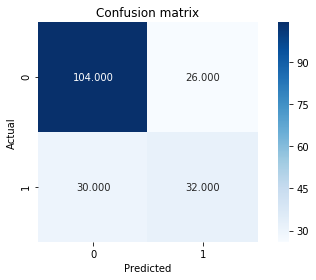

In [244]:
# CLASSIFIER: k-Nearest Neighbors fore every feature
# initialize k-nearest neighbors classifier
classifier = KNeighborsClassifier(n_neighbors = 3)  
classifier.fit(x_train, y_train)

# predict class labels using k-nearest neighbors classifier
y_pred = classifier.predict(x_test) 

# compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [245]:
# CLASSIFIER: k-Nearest Neighbors fore every feature
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)

Accuracy
0.7083333333333334

Error
0.29166666666666663

Precision
[0.7761194  0.55172414]

Recall
[0.8        0.51612903]

F1_score
[0.78787879 0.53333333]


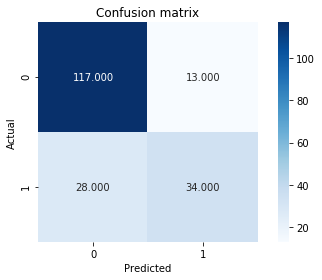

In [246]:
# CLASSIFIER: Linear SVM
# initialize linear SVM classifier
classifier = SVC(kernel = 'linear')  
classifier.fit(x_train, y_train)

# predict class labels using linear SVM classifier
y_pred = classifier.predict(x_test)

# compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [247]:
# CLASSIFIER: Linear SVM for every feature
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)

Accuracy
0.7864583333333334

Error
0.21354166666666663

Precision
[0.80689655 0.72340426]

Recall
[0.9       0.5483871]

F1_score
[0.85090909 0.62385321]


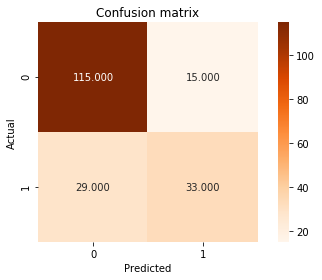

In [248]:
# Partition the dataset into a training set and a validation set using the holdout method or
# the cross-validation method. 
x_train, x_test, y_train, y_test = train_test_split(DIABETES_DATA[['Pregnancies','Glucose',
                                                                  'Insulin', 'BMI', 
                                                                   'DiabetesPedigreeFunction', 'Age']],DIABETES_DATA['Outcome'],test_size=0.25,random_state=0)
#Standardize the training set and the validation set.
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test)

#NAIVE BAYES CLASSIFIER FOR 'Pregnancies','Glucose','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age' 
# Greates difference in meeans
classifier=GaussianNB()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [249]:
#NAIVE BAYES CLASSIFIER FOR 'Pregnancies','Glucose','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age' 
# Greates difference in meeans
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)

Accuracy
0.7708333333333334

Error
0.22916666666666663

Precision
[0.79861111 0.6875    ]

Recall
[0.88461538 0.53225806]

F1_score
[0.83941606 0.6       ]


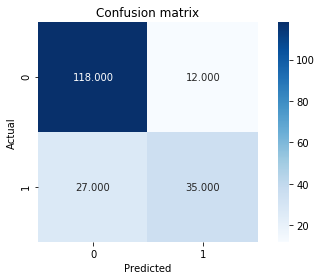

In [250]:
# CLASSIFIER: Linear SVM 
# initialize linear SVM classifier
classifier = SVC(kernel = 'linear')  
classifier.fit(x_train, y_train)

# predict class labels using linear SVM classifier
y_pred = classifier.predict(x_test)

# compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [251]:
# CLASSIFIER: Linear SVM 
# BEST F1 SCORE*************************************
# BEST ACCURACY*************************************
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)

Accuracy
0.796875

Error
0.203125

Precision
[0.8137931  0.74468085]

Recall
[0.90769231 0.56451613]

F1_score
[0.85818182 0.64220183]


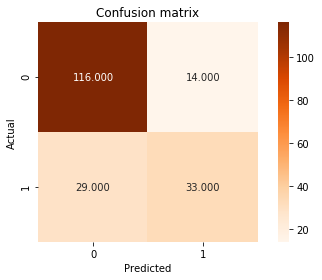

In [252]:
# Partition the dataset into a training set and a validation set using the holdout method or
# the cross-validation method. 
x_train, x_test, y_train, y_test = train_test_split(DIABETES_DATA[['Glucose','BMI']],DIABETES_DATA['Outcome'],test_size=0.25,random_state=0)
#Standardize the training set and the validation set.
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test)

#NAIVE BAYES CLASSIFIER FOR 'Glucose','BMI'
# For lowest P-values
classifier=GaussianNB()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [253]:
#NAIVE BAYES CLASSIFIER FOR 'Glucose','BMI'
# For lowest P-values
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)

Accuracy
0.7760416666666666

Error
0.22395833333333337

Precision
[0.8        0.70212766]

Recall
[0.89230769 0.53225806]

F1_score
[0.84363636 0.60550459]


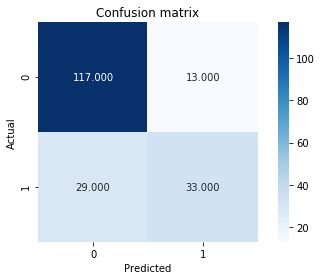

In [254]:
# CLASSIFIER: Linear SVM 
# initialize linear SVM classifier
classifier = SVC(kernel = 'linear')  
classifier.fit(x_train, y_train)

# predict class labels using linear SVM classifier
y_pred = classifier.predict(x_test)

# compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [255]:
# CLASSIFIER: Linear SVM 
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)

Accuracy
0.78125

Error
0.21875

Precision
[0.80136986 0.7173913 ]

Recall
[0.9        0.53225806]

F1_score
[0.84782609 0.61111111]


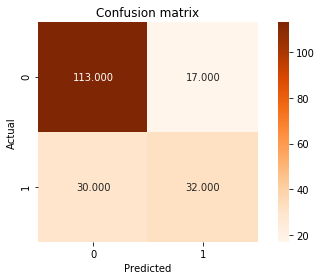

In [256]:
# CLASSIFICATION 
# 4. Highest R-Squared in multiple regression grouped together 
# (BMI ~ BloodPressure + SkinThickness + Glucose)
x_train,x_test,y_train,y_test=train_test_split(DIABETES_DATA[['BMI','BloodPressure','SkinThickness','Glucose']],DIABETES_DATA['Outcome'],test_size=0.25,random_state=0)

#Standardize the training set and the validation set.
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test)
classifier=GaussianNB()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [257]:
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)

Accuracy
0.7552083333333334

Error
0.24479166666666663

Precision
[0.79020979 0.65306122]

Recall
[0.86923077 0.51612903]

F1_score
[0.82783883 0.57657658]


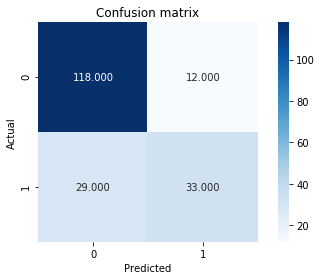

In [258]:
# initialize linear SVM classifier
classifier = SVC(kernel = 'linear')  
classifier.fit(x_train, y_train)

# predict class labels using linear SVM classifier
y_pred = classifier.predict(x_test)

# compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [259]:
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)

Accuracy
0.7864583333333334

Error
0.21354166666666663

Precision
[0.80272109 0.73333333]

Recall
[0.90769231 0.53225806]

F1_score
[0.85198556 0.61682243]


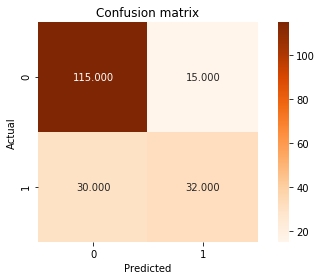

In [260]:
#(Glucose ~ BMI + Age + Insulin + BloodPressure)
x_train,x_test,y_train,y_test=train_test_split(DIABETES_DATA[['BMI','BloodPressure','Insulin','Glucose','Age']],DIABETES_DATA['Outcome'],test_size=0.25,random_state=0)

#Standardize the training set and the validation set.
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test)

classifier=GaussianNB()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


In [261]:
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)

Accuracy
0.765625

Error
0.234375

Precision
[0.79310345 0.68085106]

Recall
[0.88461538 0.51612903]

F1_score
[0.83636364 0.58715596]


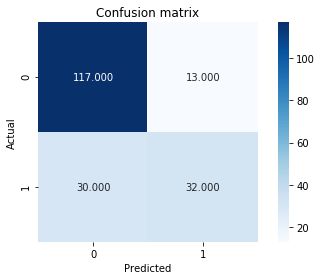

In [262]:
# initialize linear SVM classifier
classifier = SVC(kernel = 'linear')  
classifier.fit(x_train, y_train)

# predict class labels using linear SVM classifier
y_pred = classifier.predict(x_test)

# compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


In [263]:
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)


Accuracy
0.7760416666666666

Error
0.22395833333333337

Precision
[0.79591837 0.71111111]

Recall
[0.9        0.51612903]

F1_score
[0.84476534 0.59813084]


[(  1, 138,  3, 123.5       , 0.94070582, 576, 576.)
 (  2,   9,  0,  26.45000076, 0.68523614, 329, 329.)
 (  3,   4,  3, 106.5       , 0.09140162,  86,  86.)
 ( -1,  -1, -2,  -2.        , 0.        ,  63,  63.)
 (  5,   8,  3, 107.5       , 0.25801867,  23,  23.)
 (  6,   7,  0,  23.75      , 0.91829583,   3,   3.)
 ( -1,  -1, -2,  -2.        , 0.        ,   1,   1.)
 ( -1,  -1, -2,  -2.        , 0.        ,   2,   2.)
 ( -1,  -1, -2,  -2.        , 0.        ,  20,  20.)
 ( 10,  59,  2,  28.5       , 0.79966296, 243, 243.)
 ( 11,  16,  0,  30.95000076, 0.53283506, 132, 132.)
 ( 12,  13,  3, 118.5       , 0.17925607,  37,  37.)
 ( -1,  -1, -2,  -2.        , 0.        ,  35,  35.)
 ( 14,  15,  0,  29.45000076, 1.        ,   2,   2.)
 ( -1,  -1, -2,  -2.        , 0.        ,   1,   1.)
 ( -1,  -1, -2,  -2.        , 0.        ,   1,   1.)
 ( 17,  22,  1,  53.        , 0.62924922,  95,  95.)
 ( 18,  21,  1,  49.        , 0.97095059,   5,   5.)
 ( 19,  20,  1,  39.        , 0.91829583,   3,

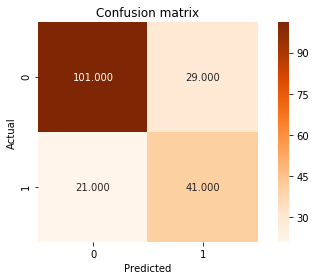

In [266]:
# (BloodPressure ~ Age+BMI+Glucose)
x_train,x_test,y_train,y_test=train_test_split(DIABETES_DATA[['BMI','BloodPressure','Age','Glucose']],DIABETES_DATA['Outcome'],test_size=0.25,random_state=0)

#Standardize the training set and the validation set.
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test)

classifier=DecisionTreeClassifier(criterion='entropy',random_state=10)
classifier.fit(x_train,y_train)

print(classifier.tree_.__getstate__()['nodes'])
len(classifier.tree_.__getstate__()['nodes'])


# TASK 7 CONTINUED - Decision Trees(Confusion Matrix)
y_pred=classifier.predict(x_test)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


In [267]:
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)


Accuracy
0.7395833333333334

Error
0.26041666666666663

Precision
[0.82786885 0.58571429]

Recall
[0.77692308 0.66129032]

F1_score
[0.8015873  0.62121212]


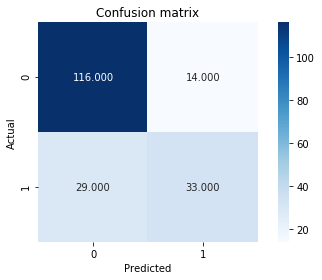

In [268]:
# initialize linear SVM classifier
classifier = SVC(kernel = 'linear')  
classifier.fit(x_train, y_train)

# predict class labels using linear SVM classifier
y_pred = classifier.predict(x_test)

# compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


In [269]:
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)

Accuracy
0.7760416666666666

Error
0.22395833333333337

Precision
[0.8        0.70212766]

Recall
[0.89230769 0.53225806]

F1_score
[0.84363636 0.60550459]


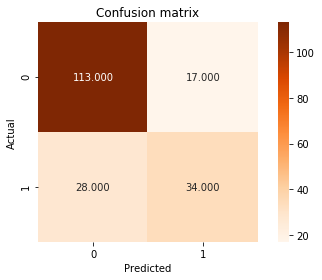

In [270]:
classifier=GaussianNB()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [271]:
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)

Accuracy
0.765625

Error
0.234375

Precision
[0.80141844 0.66666667]

Recall
[0.86923077 0.5483871 ]

F1_score
[0.83394834 0.60176991]
